In [57]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

In [58]:
file = '../../../../../dataframes/enigh/2016/df_transform_09.csv'

In [98]:
df <- read.csv(file = file)
data <- df
head(data)

tam_loc,est_socio,clase_hog,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,mayores,⋯,cuota_viv,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog
0.09607617,0.04148875,0.09873053,0.06560877,0.2820513,0.07184074,0.2000000,0.09090909,0.4285714,0.2,⋯,0,0.000000000,0.00000000,0,0,0,0,0.0000000,0.000000000,0
0.09607617,0.04148875,0.01598384,0.06560877,0.8333333,0.07184074,0.0000000,0.09090909,0.0000000,0.0,⋯,0,0.000000000,0.00000000,0,0,0,0,0.0000000,0.000000000,0
0.09607617,0.04148875,0.07362954,0.10000000,0.3333333,0.07184074,0.1333333,0.18181818,0.1428571,0.1,⋯,0,0.000000000,0.00000000,0,0,0,0,0.0000000,0.000000000,0
0.09607617,0.04148875,0.01598384,0.06560877,0.3846154,0.09434507,0.0000000,0.09090909,0.0000000,0.0,⋯,0,0.000000000,0.00000000,0,0,0,0,0.0000000,0.000000000,0
0.09607617,0.04148875,0.01598384,0.06560877,0.7307692,0.09434507,0.0000000,0.09090909,0.0000000,0.0,⋯,0,0.000000000,0.00000000,0,0,0,0,0.2199293,0.000000000,0
0.09607617,0.04148875,0.09873053,0.06560877,0.5384615,0.02371610,0.4666667,0.18181818,0.8571429,0.6,⋯,0,0.009047614,0.02041893,0,0,0,0,0.0000000,0.008660727,0


In [99]:
ncol(data)

[1] 117

In [61]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [62]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
tam_loc,0.2054088
est_socio,1.0104823
clase_hog,1.0209569
sexo_jefe,0.6435964
edad_jefe,4.1157145
educa_jefe,2.0518012


In [63]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
17,ing_cor,7.436011
49,gasto_mon,7.435709
84,transporte,7.215884
71,vivienda,7.166427
50,alimentos,7.153190
96,personales,7.066486


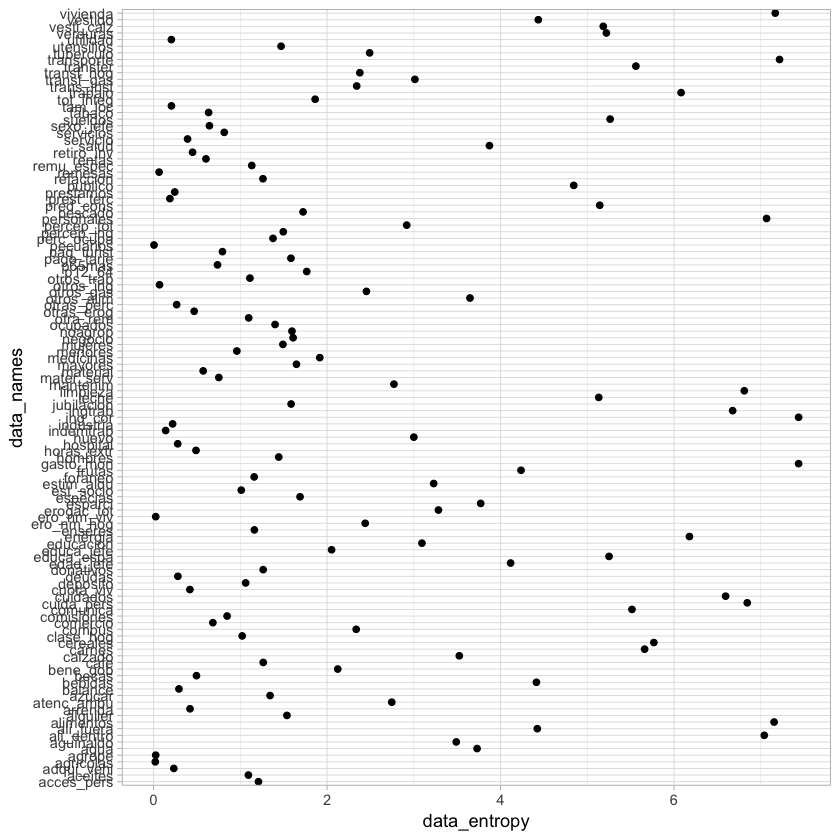

In [64]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

In [81]:
y <- order_df_entropy[2,][1]
y

,data_names
49,gasto_mon


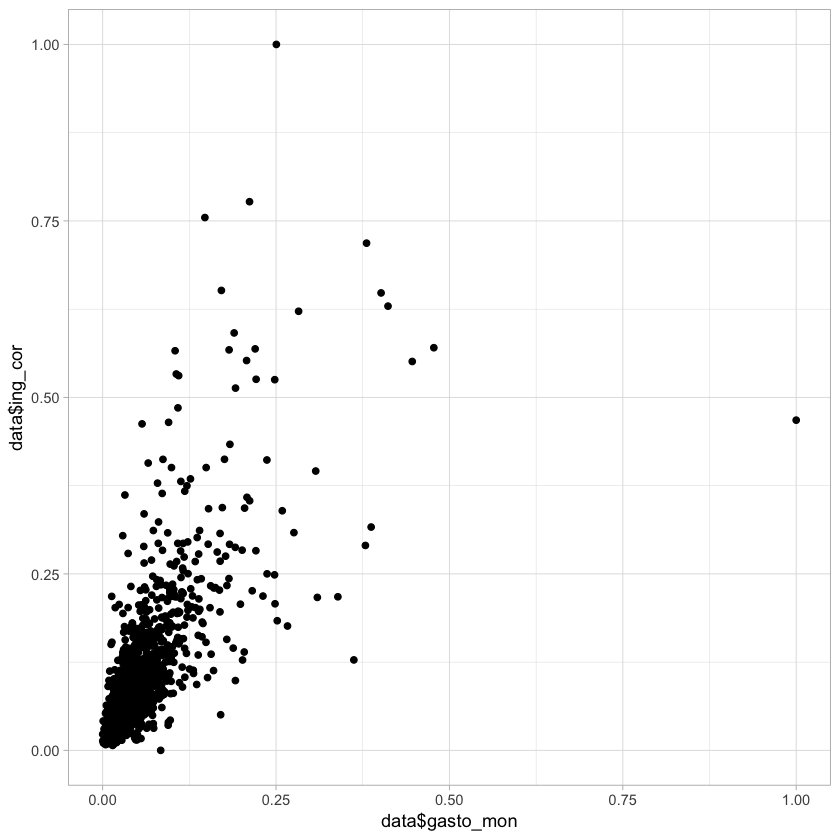

In [89]:
x = data[1]
ggplot(data = data, 
       aes(y=data$ing_cor, 
           x=data$gasto_mon)) + geom_point() + theme_light()

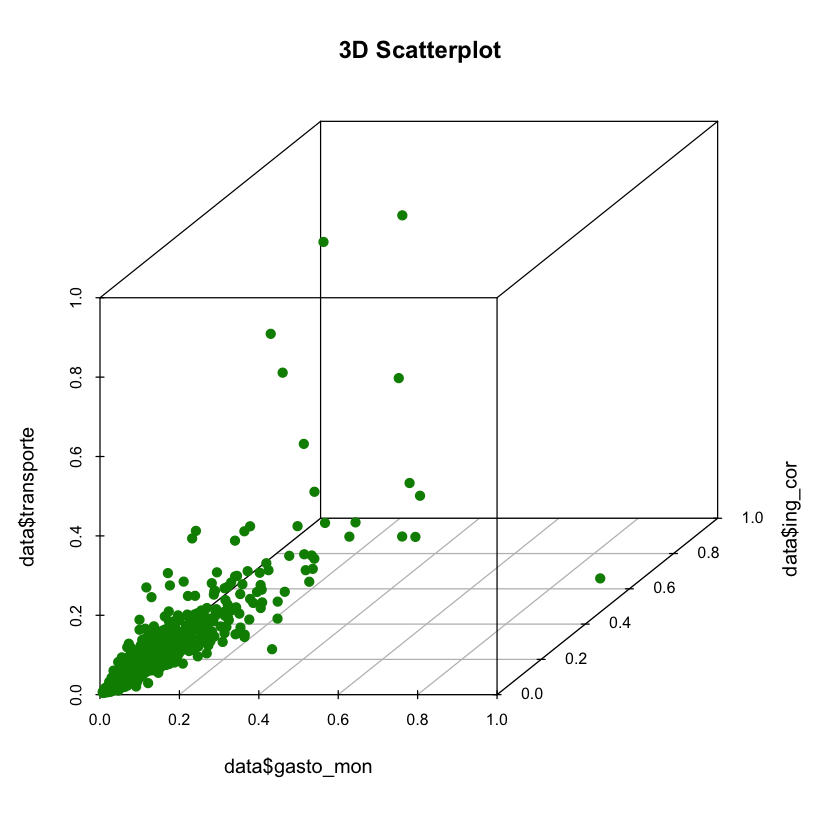

In [90]:
scatterplot3d(y=data$ing_cor, 
              x=data$gasto_mon,
              z=data$transporte, pch = 19, color = "green4", main="3D Scatterplot")

In [91]:
write.csv(order_df_entropy, 
          file = '../../../../../dataframes/enigh/2016/df_entropy_09.csv',
          row.names=FALSE)


In [95]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    #part = kmeans$cluster, 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

Warning message:
“did not converge in 10 iterations”

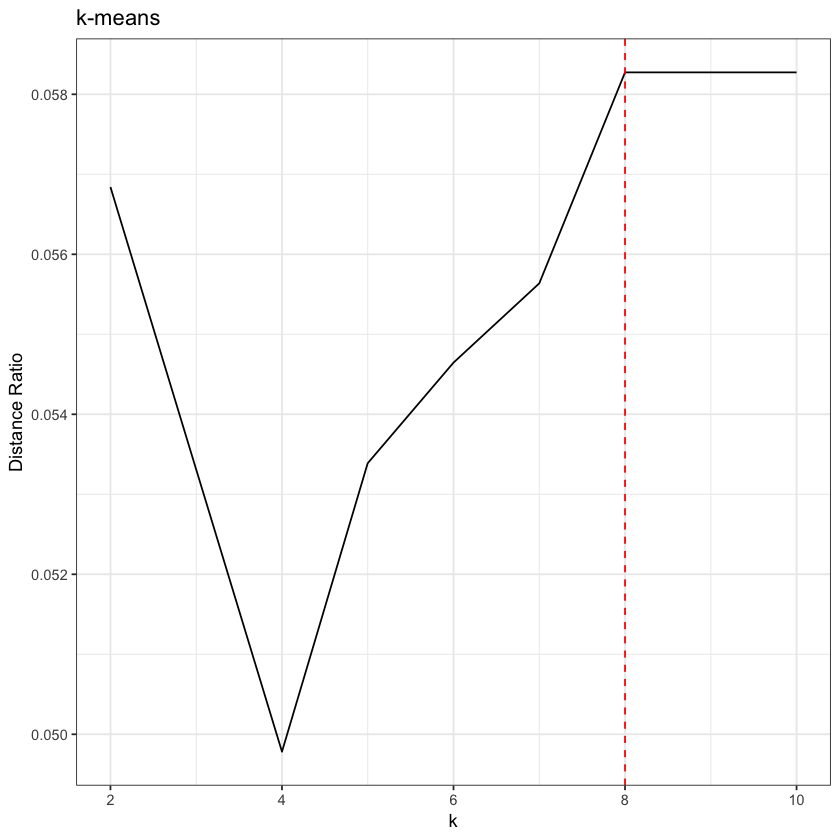

In [96]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'k-means', 
                                   xlab = 'k', 
                                   ylab = 'Distance Ratio')

plot_dunn_kmeans <- plot_dunn_kmeans  + 
  theme_bw() + #ylim(0,0.3) + 
  geom_vline(xintercept = range_k[which.max(dunn_kmeans)],
             linetype = 2, color='red')   
#ggsave(filename = "../../images/enh/dunn_kmeans_2_15.png", dpi = 300)

plot_dunn_kmeans

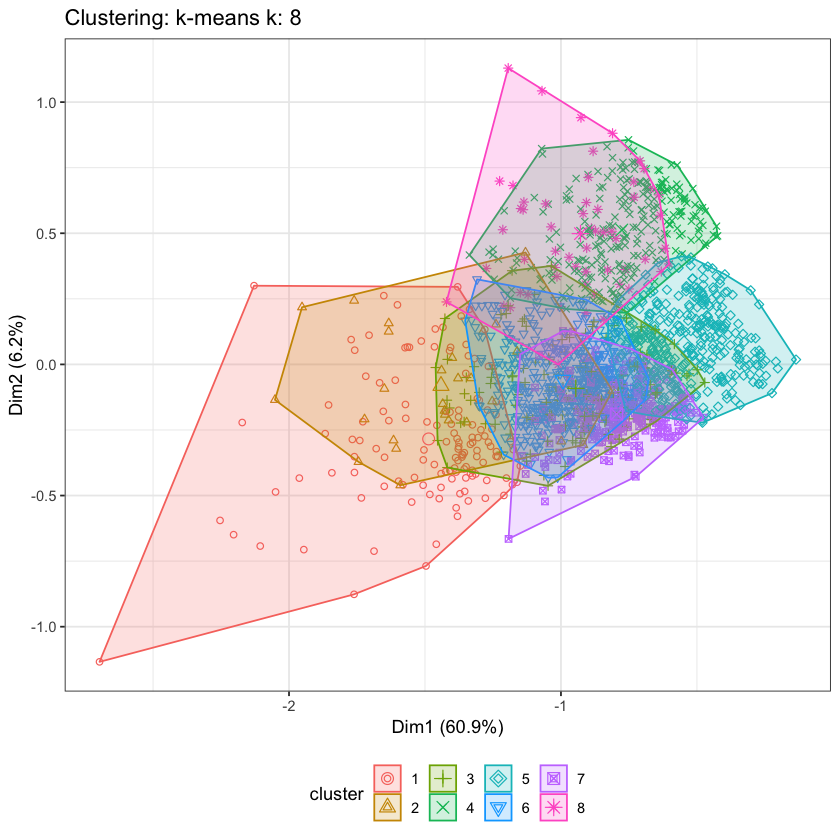

In [97]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Clustering: k-means k:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans <- plot_kmeans + 
  theme_bw() +
  theme(legend.position = 'bottom')  

plot_kmeans
